In [1]:
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist
from minisom import MiniSom 
from math import sqrt
from sklearn.preprocessing import scale

blood_data = pd.read_csv('blood_data.csv')
sat_data = pd.read_csv('satellite_data.csv')
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [2]:
blood_x = scale(blood_data.iloc[:,:-1].to_numpy())
blood_y = blood_data.iloc[:,-1].to_numpy()

sat_x = scale(sat_data.iloc[:,:-1].to_numpy())
sat_y = sat_data.iloc[:,-1].to_numpy()

fashion_x = np.concatenate((train_X, test_X), axis=0)
fashion_y = np.concatenate((train_y, test_y), axis=0)
fashion_x = scale(np.reshape(fashion_x, (fashion_x.shape[0], fashion_x.shape[1]**2)))

## Blood cells map

In [16]:
dim = int(sqrt(5*sqrt(len(blood_x))))
som = MiniSom(dim, dim, blood_x.shape[1], sigma=5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular')
som.pca_weights_init(blood_x)
som.train(blood_x, 10000, random_order=True, verbose=False) # trains the SOM with 100 iterations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


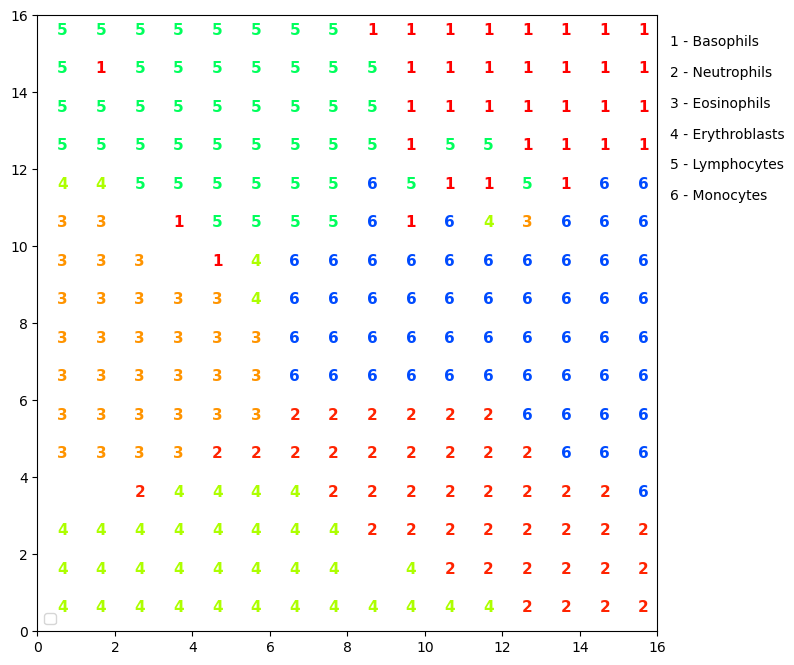

In [48]:
import matplotlib.pyplot as plt

label_names = {1: "Basophils", 2: "Neutrophils", 3: "Eosinophils", 4: "Erythroblasts", 5: "Lymphocytes", 6: "Monocytes"}
plt.figure(figsize=(8, 8))
winners = {}
for x, t in zip(blood_x, blood_y):  # scatterplot
    w = som.winner(x)
    if (w[0]+.5, w[1]+.5) not in winners:
        winners[(w[0]+.5, w[1]+.5)] = [0]*len(np.unique(blood_y))
    winners[(w[0]+.5, w[1]+.5)][int(t)-1] += 1

for key in winners:
    plt.text(key[0], key[1], winners[key].index(max(winners[key]))+1, color=plt.cm.hsv( winners[key].index(max(winners[key]))**2 / 40), fontdict={'weight': 'bold',  'size': 11})
    
# Adding text annotations for custom legend
plt.text(1.02, 0.95, '1 - Basophils', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.90, '2 - Neutrophils', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.85, '3 - Eosinophils', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.80, '4 - Erythroblasts', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.75, '5 - Lymphocytes', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.70, '6 - Monocytes', color='black', transform=plt.gca().transAxes)

plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.legend(loc='lower left')
plt.show()

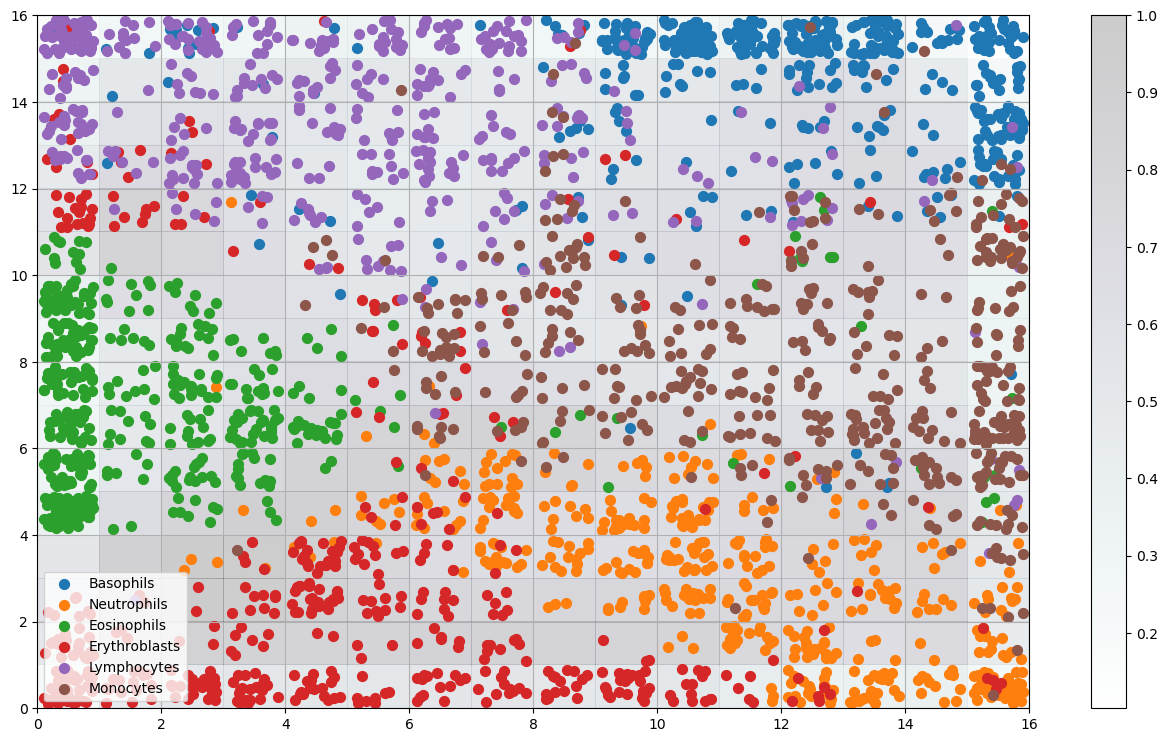

In [37]:
w_x, w_y = zip(*[som.winner(d) for d in blood_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(16, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for c in np.unique(blood_y):
    c=int(c)
    idx_target = blood_y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='lower left')
plt.grid()
plt.show()

## Satellite map

In [93]:
dim = int(sqrt(5*sqrt(len(sat_x))))
som = MiniSom(dim, dim, sat_x.shape[1], sigma=6, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular', activation_distance = 'manhattan')         
som.pca_weights_init(sat_x)
som.train(sat_x, 10000, random_order=True, verbose=False) # trains the SOM with 100 iterations

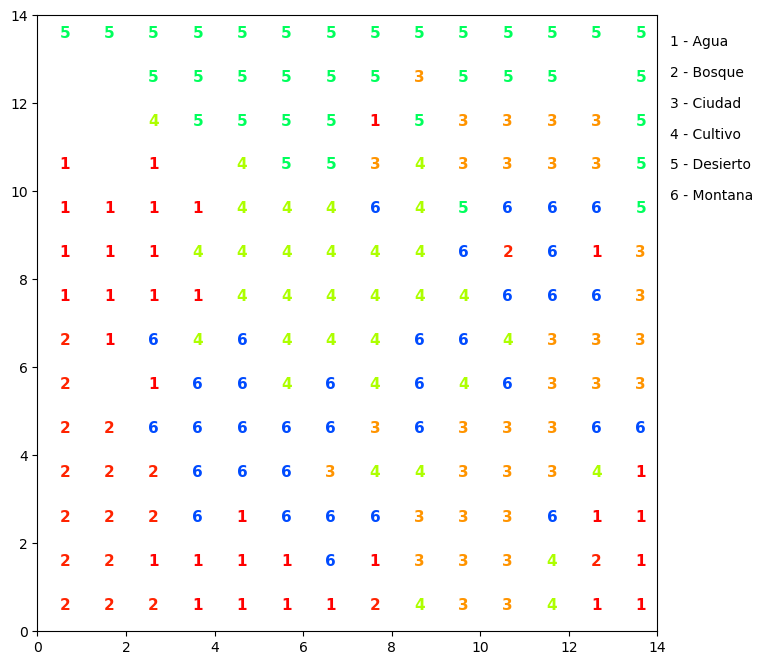

In [94]:
plt.figure(figsize=(8, 8))
winners = {}
for x, t in zip(sat_x, sat_y):  # scatterplot
    w = som.winner(x)
    if (w[0]+.5, w[1]+.5) not in winners:
        winners[(w[0]+.5, w[1]+.5)] = [0]*len(np.unique(sat_y))
    winners[(w[0]+.5, w[1]+.5)][int(t)-1] += 1

for key in winners:
    plt.text(key[0], key[1], winners[key].index(max(winners[key]))+1 , color=plt.cm.hsv( winners[key].index(max(winners[key]))**2 / 40), fontdict={'weight': 'bold',  'size': 11})           

# Adding text annotations for custom legend
plt.text(1.02, 0.95, '1 - Agua', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.90, '2 - Bosque', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.85, '3 - Ciudad', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.80, '4 - Cultivo', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.75, '5 - Desierto', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.70, '6 - Montana', color='black', transform=plt.gca().transAxes)
    
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

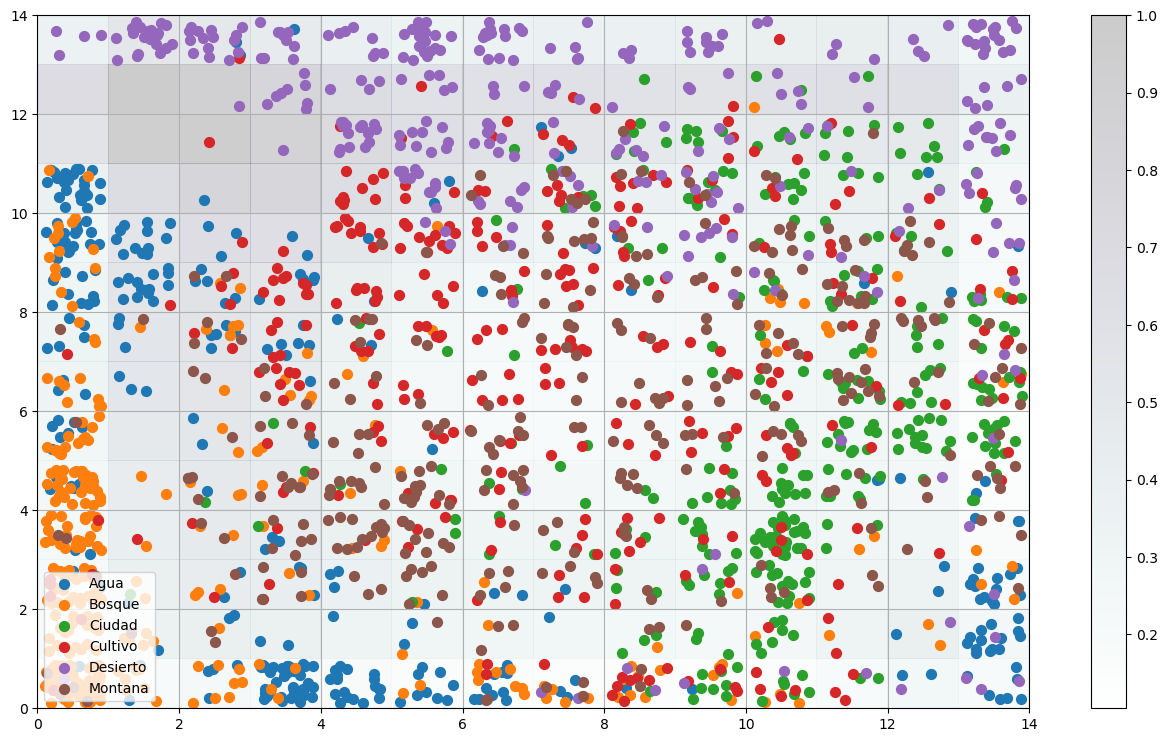

In [95]:
w_x, w_y = zip(*[som.winner(d) for d in sat_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(16, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

label_names = {
    1: "Agua",
    2: "Bosque",
    3: "Ciudad",
    4: "Cultivo",
    5: "Desierto",
    6: "Montana",
}
for c in np.unique(sat_y):
    c=int(c)
    idx_target = sat_y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='lower left')
plt.grid()
plt.show()

## Fashion map

In [78]:
fashion_y = test_y
fashion_x = scale(np.reshape(test_X, (test_X.shape[0], test_X.shape[1]**2)))

In [86]:
dim = int(sqrt(5*sqrt(len(fashion_x))))
som = MiniSom(dim, dim, fashion_x.shape[1], sigma=8, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular')
som.pca_weights_init(fashion_x)
som.train(fashion_x, 1000, random_order=True, verbose=False) # trains the SOM with 100 iterations

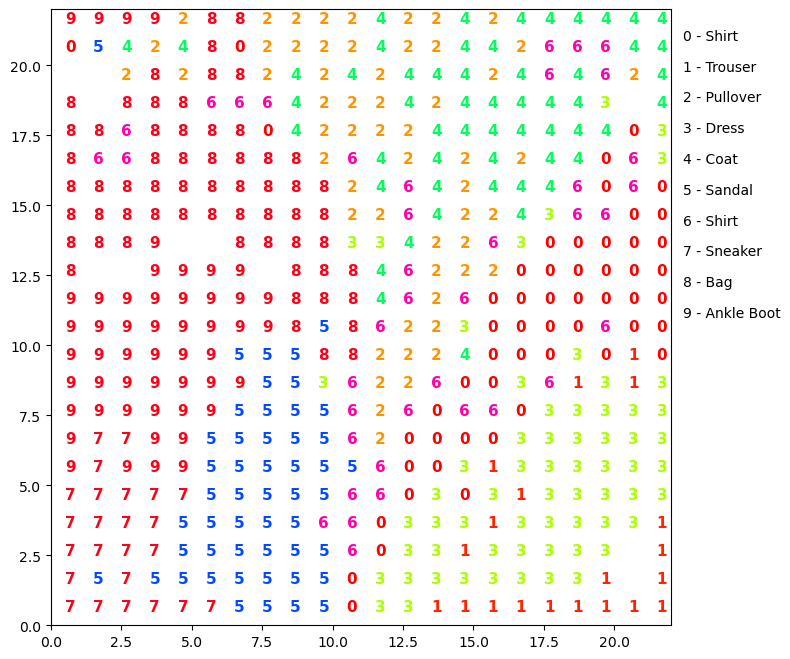

In [91]:
label_names = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

plt.figure(figsize=(8, 8))
winners = {}
for x, t in zip(fashion_x, fashion_y):  # scatterplot
    w = som.winner(x)
    if (w[0]+.5, w[1]+.5) not in winners:
        winners[(w[0]+.5, w[1]+.5)] = [0]*len(np.unique(fashion_y))
    winners[(w[0]+.5, w[1]+.5)][int(t)] += 1

for key in winners:
    plt.text(key[0], key[1], winners[key].index(max(winners[key])) , color=plt.cm.hsv( winners[key].index(max(winners[key]))**2 / 40), fontdict={'weight': 'bold',  'size': 11})           

# Adding text annotations for custom legend
plt.text(1.02, 0.95, '0 - Shirt', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.90, '1 - Trouser', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.85, '2 - Pullover', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.80, '3 - Dress', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.75, '4 - Coat', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.70, '5 - Sandal', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.65, '6 - Shirt', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.60, '7 - Sneaker', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.55, '8 - Bag', color='black', transform=plt.gca().transAxes)
plt.text(1.02, 0.50, '9 - Ankle Boot', color='black', transform=plt.gca().transAxes)   
    
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

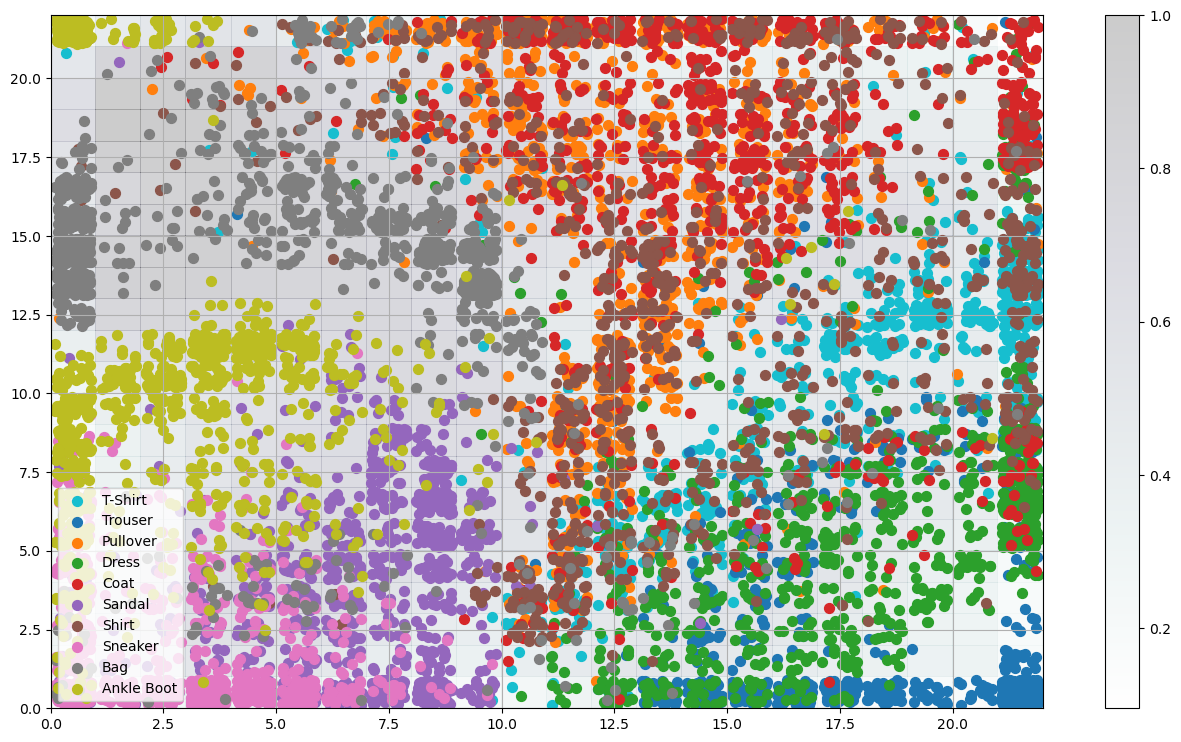

In [92]:
w_x, w_y = zip(*[som.winner(d) for d in fashion_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(16, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(fashion_y):
    c=int(c)
    idx_target = fashion_y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [12]:
dim = int(sqrt(5*sqrt(len(fashion_x))))
som = MiniSom(dim, dim, fashion_x.shape[1], sigma=12, learning_rate=0.5, neighborhood_function='gaussian', random_seed=0, topology='rectangular')
som.pca_weights_init(fashion_x)
som.train(fashion_x, 1000, random_order=True, verbose=False) # trains the SOM with 100 iterations

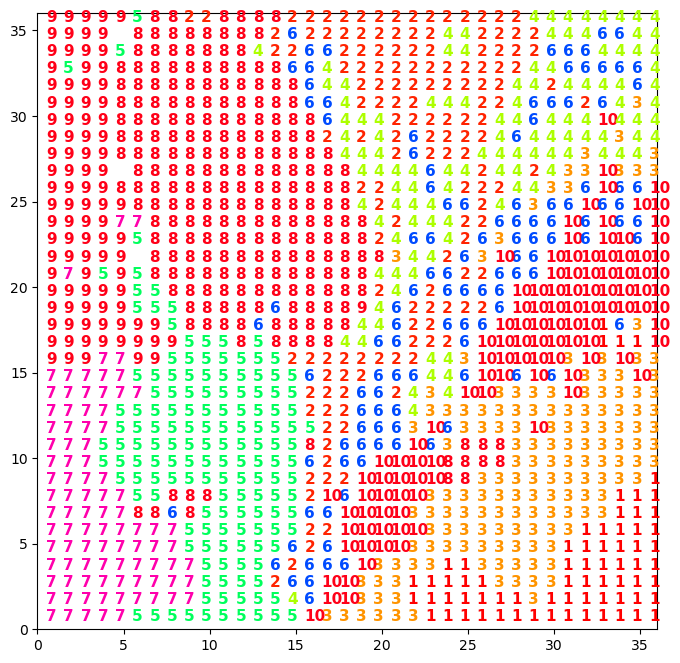

In [13]:
label_names = {0:'T-Shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

plt.figure(figsize=(8, 8))
winners = {}
for x, t in zip(fashion_x, fashion_y):  # scatterplot
    w = som.winner(x)
    if (w[0]+.5, w[1]+.5) not in winners:
        winners[(w[0]+.5, w[1]+.5)] = [0]*len(np.unique(fashion_y))
    winners[(w[0]+.5, w[1]+.5)][int(t)-1] += 1

for key in winners:
    plt.text(key[0], key[1], winners[key].index(max(winners[key]))+1 , color=plt.cm.hsv( winners[key].index(max(winners[key]))**2 / 40), fontdict={'weight': 'bold',  'size': 11})           

plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()